# Electrocardiogram Sınıflandırması

## (1) Electrocardiogramlar

👇 [`electrocardiograms.csv`](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_dataset.csv) veri setini içe aktarın ve ilk 5 satırını görüntüleyin

In [123]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve,cross_validate, train_test_split,cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

pd.set_option("display.max_columns", None)

#!curl -s https://d32aokrjazspmn.cloudfront.net/materials/ML_Electrocardiograms_dataset.csv

#data = pd.read_csv('ML_Electrocardiograms_dataset.csv')

url = "https://d32aokrjazspmn.cloudfront.net/materials/ML_Electrocardiograms_dataset.csv"
df = pd.read_csv(url)
df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108,x_109,x_110,x_111,x_112,x_113,x_114,x_115,x_116,x_117,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127,x_128,x_129,x_130,x_131,x_132,x_133,x_134,x_135,x_136,x_137,x_138,x_139,x_140,x_141,x_142,x_143,x_144,x_145,x_146,x_147,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157,x_158,x_159,x_160,x_161,x_162,x_163,x_164,x_165,x_166,x_167,x_168,x_169,x_170,x_171,x_172,x_173,x_174,x_175,x_176,x_177,x_178,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,0.511236,0.520599,0.548689,0.599251,0.606742,0.640449,0.664794,0.730337,0.780899,0.852060,0.897004,0.953184,0.970037,1.000000,0.992509,0.985019,0.943820,0.898876,0.823970,0.752809,0.711610,0.666667,0.602996,0.576779,0.597378,0.670412,0.595506,0.513109,0.423221,0.277154,0.119850,0.082397,0.022472,0.039326,0.054307,0.063670,0.198502,0.303371,0.355805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,0.308929,0.305357,0.291071,0.285714,0.283929,0.271429,0.255357,0.264286,0.260714,0.251786,0.241071,0.226786,0.217857,0.200000,0.173214,0.164286,0.160714,0.155357,0.141071,0.144643,0.155357,0.167857,0.175000,0.192857,0.223214,0.251786,0.255357,0.276786,0.310714,0.323214,0.323214,0.326786,0.342857,0.346429,0.339286,0.342857,0.348214,0.346429,0.335714,0.335714,0.339286,0.341071,0.342857,0.357143,0.358929,0.328571,0.308929,0.360714,0.455357,0.457143,0.366071,0.205357,0.114286,0.048214,0.000000,0.041071,0.101786,0.146429,0.187500,0.246429,0.301786,0.351786,0.382143,0.387500,0.398214,0.407143,0.407143,0.410714,0.421429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.

💓 Veri setinin her gözlemi, bir hastanın electrocardiogram (ECG)'ından alınan ölçülmüş kalp atışları dizisidir.

🎯 Hedef ikili değerlidir ve kalp atışının şunları gösterip göstermediğini tanımlar:
* kardiyovasküler hastalık riski 🔴 (1)
* yoksa risk yok 🟢 (0)

## (2) Veri Keşfi

❓ **Soru** ❓

Sayıların neyi temsil ettiği hakkında görsel bir fikir edinmek için her hedef sınıfından bir gözlemi çizin.

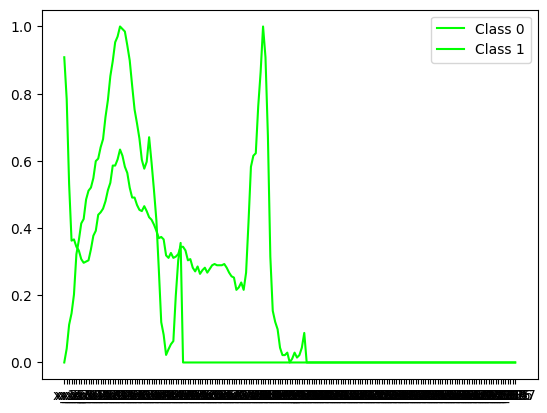

In [108]:
#df['target'].unique()
samples = data.groupby("target").first()
#samples

signal_cols = data.columns[:-1]


for target, row in samples.iterrows():
    plt.plot(row[signal_cols], label=f"Class {target}", color = "lime")

plt.legend()
plt.show()

❓ **Sorular** ❓

* Kaç tane riskli kalp atışı gözlemi var? Cevabınızı `at_risk_count` olarak kaydedin.

In [109]:

#df['target'].value_counts()

at_risk_count = (df['target'] != 0).sum()
print(f"At risk count: {at_risk_count}")


At risk count: 1448


* Kaç tane sağlıklı kalp atışı gözlemi var? Cevabınızı `healthy_count` olarak kaydedin.

In [110]:
healthy_count = (df['target'] == 0).sum()
print(f"Healthy: {healthy_count}")

Healthy: 18117


👩🏻‍🏫 Belirli durumlarda, sınıf dengesi gerçek sınıf dağılımını temsil eder. Burada durum budur: insanların büyük çoğunluğunun aslında sağlıklı kalpleri vardır. Bu durumda, modeli gerçekliğe dayalı olarak eğitmek için sınıf dağılımını koruruz ve modelleme yaklaşımımızı buna göre uyarlarız.

[Centers for Disease Control and Prevention - Heart Disease Facts](https://www.cdc.gov/heartdisease/facts.htm)

🧪 **Kodunuzu kontrol edin**

In [111]:
from nbresult import ChallengeResult

result = ChallengeResult('class_balance',
                         healthy = healthy_count,
                         at_risk = at_risk_count)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/zeynepdil/code/S16D3-S-data-electrocardiograms/tests
plugins: typeguard-4.4.2, anyio-4.8.0, dash-3.3.0
collecting ... collected 2 items

test_class_balance.py::TestClass_balance::test_at_risk_count PASSED      [ 50%]
test_class_balance.py::TestClass_balance::test_healthy_count PASSED      [100%]

============================== 2 passed in 0.19s ===============================


💯 You can commit your code:

git add tests/class_balance.pickle

git commit -m 'Completed class_balance step'

git push origin master



##  (3) Logistic Regression

🎯 Göreviniz **kardiyovasküler hastalık riski altındaki kalp atışlarını işaretlemektir.**

👇 Bu görevde `LogisticRegression`'ın performansını araştırarak başlayalım. Modeli aşağıdaki metriklerde değerlendirmek için ***çapraz doğrulama kullanın***:
- Doğruluk (Accuracy)
- Hatırlama (Recall)
- Kesinlik (Precision)
- F1

In [112]:

X = df.drop("target", axis=1)
y =df["target"]

log_reg = LogisticRegression(max_iter = 1000)

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}

scores = cross_validate(
    log_reg,
    X,
    y,
    cv=5,
    scoring=scoring
)

print("Accuracy:", scores["test_accuracy"].mean())
print("Precision:", scores["test_precision"].mean())
print("Recall:", scores["test_recall"].mean())
print("F1 Score:", scores["test_f1"].mean())

Accuracy: 0.9388193202146692
Precision: 0.6820799701178101
Recall: 0.3266412122658394
F1 Score: 0.44083912912652645


❓ **Soru (Doğru tahminlerin oranı)** ❓ 

Bu model için doğru tahminlerin oranı nedir? Cevabınızı `correct_pred_ratio` değişken adıyla kaydedin.

In [113]:
correct_pred_ratio = scores["test_accuracy"].mean()
correct_pred_ratio

0.9388193202146692

❓ **Soru (Riskli hastaları işaretleme yeteneği)** ❓ 

Model riskli kalp atışlarının yüzde kaçını işaretleyebiliyor? Cevabınızı `flag_ratio` değişken adıyla kaydedin.

In [114]:
flag_ratio = scores["test_recall"].mean()
flag_ratio

0.3266412122658394

❓ **Soru (Doğru işaretleme yeteneği)** ❓ 

Model riskli bir kalp atışı sinyali verdiğinde, ne sıklıkta doğrudur? Cevabınızı `correct_detection_ratio` değişken adıyla kaydedin.

In [115]:
correct_detection_ratio = scores["test_precision"].mean()
correct_detection_ratio

0.6820799701178101

❓ **Soru (Çok fazla yanlış alarm olmadan mümkün olduğunca çok riskli hastayı tespit etme)** ❓ 

Modelin yanlış alarmları sınırlarken mümkün olduğunca çok riskli kalp atışını işaretleme yeteneği nedir? Cevabınızı `aggregated_metric` değişken adıyla kaydedin.

In [116]:
aggregated_metric = scores["test_f1"].mean()
aggregated_metric

0.44083912912652645

🧪 **Kodunuzu kontrol edin**

In [117]:
from nbresult import ChallengeResult

result = ChallengeResult('logistic_regression_evaluation',
                         accuracy = correct_pred_ratio,
                         recall = flag_ratio,
                         precision = correct_detection_ratio,
                         f1 = aggregated_metric)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/zeynepdil/code/S16D3-S-data-electrocardiograms/tests
plugins: typeguard-4.4.2, anyio-4.8.0, dash-3.3.0
collecting ... collected 4 items

test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_accuracy PASSED [ 25%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_f1 PASSED [ 50%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_precision PASSED [ 75%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_recall PASSED [100%]

============================== 4 passed in 0.17s ===============================


💯 You can commit your code:

git add tests/logistic_regression_evaluation.pickle

git commit -m 'Completed logistic_regr

▶️ Devam etmeden önce aşağıdaki hücreyi çalıştırın:

In [118]:
print(f"You should have noticed that the model was able to predict correctly in {int(round(correct_pred_ratio,2)*100)} cases out of 100. ")

print(f"However, it was able to capture only {round(flag_ratio,2)*100} % of the at-risk patients")

print("Why ? Let's print a confusion matrix!")


You should have noticed that the model was able to predict correctly in 94 cases out of 100. 
However, it was able to capture only 33.0 % of the at-risk patients
Why ? Let's print a confusion matrix!


## (4) Karışıklık Matrisi

👇 `ConfusionMatrixDisplay` ([dokümantasyon](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)) kullanarak, Logistic Regression modelinin tahmin dökümünü görselleştirin.

<details>
<summary>💡 İpuçları</summary>

    
1. [from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator)    
2. [from_predictions](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions)
    
- Veri setinizi [`train-test-split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) ile ayırmak ve test setindeki karışıklık matrisine bakmak için **Holdout yöntemine** geri dönmeyi unutmayın.  
</details>

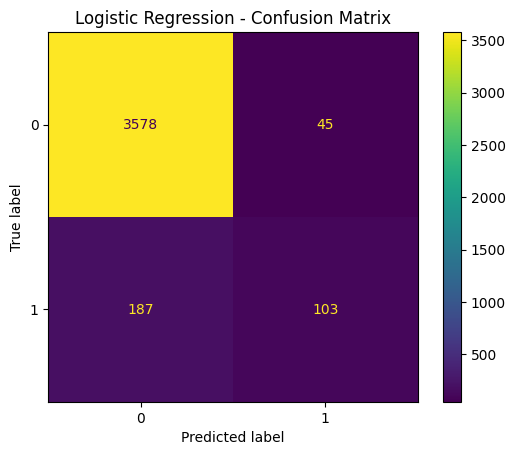

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


ConfusionMatrixDisplay.from_estimator(
    log_reg,
    X_test,
    y_test
)

plt.title("Logistic Regression - Confusion Matrix")
plt.show()



ℹ️ Karışıklık matrisi, modelin sınıf dengesizliğinden etkilendiğini göstermelidir: kalp atışlarını çoğu zaman sağlıklı olarak tahmin eder. Bu davranış nedeniyle, model sıklıkla doğrudur ve **yüksek doğruluğa** sahiptir. Ancak bu aynı zamanda birçok riskli kalp atışını kaçırmasına da neden olur: **kötü hatırlama** oranına sahiptir...

👉 Bu nedenle bu model **riskli gözlemleri işaretleme** görevinde zayıftır.

❗️ Doğrulukla kandırılmayın ve görevinize karşılık gelen metriğe bakın! ❗️

## (5) KNN Sınıflandırıcı

❓ **Soru (Sınıflandırma Model Seçimi)** ❓ 

Varsayılan bir KNN sınıflandırıcı, riskli gözlemleri işaretleme görevinde daha iyi performans gösterir mi?

Cevabınızı "KNN" veya "LogisticRegression" olarak `best_model` altında kaydedin.

In [120]:
log_reg = LogisticRegression(max_iter=1000)

lr_recall = cross_val_score(
    log_reg,
    X,
    y,
    cv=5,
    scoring="recall"
).mean()

knn = KNeighborsClassifier()  

knn_recall = cross_val_score(
    knn,
    X,
    y,
    cv=5,
    scoring="recall"
).mean()



if knn_recall > lr_recall:
    best_model = "KNN"
else:
    best_model = "LogisticRegression"

best_model



'KNN'

💪 Bu ECG veri seti için, KNN Sınıflandırıcı LogisticRegression'dan çok daha yüksek hatırlama oranına sahip olmalı ve bu nedenle görev için daha uygun.

🧪 **Kodunuzu kontrol edin**

In [121]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/zeynepdil/code/S16D3-S-data-electrocardiograms/tests
plugins: typeguard-4.4.2, anyio-4.8.0, dash-3.3.0
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



## (6) Sınıflandırma Raporu

Daha yüksek hatırlama oranı sayesinde KNN modelini seçtiğimize göre, şimdi diğer sınıflandırma performans metriklerine bakalım.

❓ **Soru (Sınıflandırma Raporu)** ❓

KNN modelinin [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)'unu yazdırın.

<details>
    <summary> 💡 <i>İpucu</i>  </summary>
    
* Modelin tahminlerini bir `classification_report`'a geçirmeniz gerekecek.
    
* SkLearn'ün [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) yardımcı olabilir 😉
</details>

In [122]:
knn = KNeighborsClassifier()

y_pred_knn = cross_val_predict(
    knn,
    X,
    y,
    cv=5
)

print(classification_report(y, y_pred_knn))



              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18117
           1       0.94      0.86      0.90      1448

    accuracy                           0.99     19565
   macro avg       0.96      0.93      0.94     19565
weighted avg       0.99      0.99      0.99     19565



❓ **Soru (Raporu okuma)** ❓

Riskli olarak tahmin edilen kalp atışları arasında, doğru tahminlerin oranı nedir?

Matematiksel terimlerle, raporda $ \frac{TP}{TP + FP} $ oranını okuyabilir misiniz? Bu sınıflandırma metriğinin adı nedir?

Cevabınızı `correct_at_risk_predictions` altında float olarak kaydedin

In [126]:
correct_at_risk_predictions = precision_score(y, y_pred_knn)
correct_at_risk_predictions

0.9401968205904617

🧪 **Kodunuzu kontrol edin**

In [127]:
from nbresult import ChallengeResult

result = ChallengeResult('precision',
                         precision = correct_at_risk_predictions)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/zeynepdil/code/S16D3-S-data-electrocardiograms/tests
plugins: typeguard-4.4.2, anyio-4.8.0, dash-3.3.0
collecting ... collected 1 item

test_precision.py::TestPrecision::test_precision PASSED                  [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/precision.pickle

git commit -m 'Completed precision step'

git push origin master



## (7) Tahmin

❓ **Soru (Tahmin etme)** ❓

Bir hasta ikinci görüş için size geliyor çünkü kalp atışlarına dayanarak bu hastanın risk altında olabileceği söylenmiş.

Optimal modelinize göre, o risk altında mı yoksa değil mi?

Modelinizin tahminini "at risk" veya "healthy" olarak `prediction` değişken adı altında kaydedin.

In [128]:
new_patient = pd.read_csv('https://d32aokrjazspmn.cloudfront.net/materials/ML_Electrocardiograms_new_patient.csv')
new_patient

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108,x_109,x_110,x_111,x_112,x_113,x_114,x_115,x_116,x_117,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127,x_128,x_129,x_130,x_131,x_132,x_133,x_134,x_135,x_136,x_137,x_138,x_139,x_140,x_141,x_142,x_143,x_144,x_145,x_146,x_147,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157,x_158,x_159,x_160,x_161,x_162,x_163,x_164,x_165,x_166,x_167,x_168,x_169,x_170,x_171,x_172,x_173,x_174,x_175,x_176,x_177,x_178,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187
0,0.904762,0.993197,1.0,0.956916,0.902494,0.857143,0.802721,0.777778,0.709751,0.557823,0.321995,0.192744,0.147392,0.129252,0.099773,0.092971,0.068027,0.068027,0.061224,0.040816,0.034014,0.027211,0.013605,0.00907,0.0,0.006803,0.0,0.011338,0.015873,0.031746,0.054422,0.092971,0.113379,0.160998,0.185941,0.208617,0.219955,0.240363,0.231293,0.226757,0.231293,0.238095,0.235828,0.235828,0.24263,0.249433,0.253968,0.258503,0.258503,0.256236,0.253968,0.265306,0.263039,0.272109,0.265306,0.260771,0.263039,0.267574,0.267574,0.274376,0.258503,0.265306,0.263039,0.267574,0.272109,0.263039,0.260771,0.274376,0.269841,0.274376,0.276644,0.269841,0.267574,0.274376,0.292517,0.303855,0.321995,0.337868,0.337868,0.340136,0.319728,0.297052,0.285714,0.269841,0.269841,0.274376,0.269841,0.274376,0.267574,0.260771,0.371882,0.639456,0.959184,0.807256,0.444444,0.29932,0.272109,0.278912,0.253968,0.258503,0.251701,0.256236,0.247166,0.265306,0.265306,0.267574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
patient_X = new_patient.values
knn = KNeighborsClassifier()
knn.fit(X, y)
patient_predicted = knn.predict(patient_X)[0]

if patient_predicted == 1:
    prediction = "at risk"
else:
    prediction = "healthy"

prediction

#atient_X.shape
#patient_X


/home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'at risk'

🧪 **Kodunuzu kontrol edin**

In [133]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/zeynepdil/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/zeynepdil/code/S16D3-S-data-electrocardiograms/tests
plugins: typeguard-4.4.2, anyio-4.8.0, dash-3.3.0
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction_at_risk PASSED       [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



🏁 Tebrikler!

💾 Notebook'unuzu git add/commit/push yapmayı unutmayın...

🚀 ... ve bir sonraki zorluğa geçin!